In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
x = np.concatenate([
    np.load("il_logged_/il_logs_{}.0.npz".format(i))["rmsprop_count"]
    for i in range(20)
])

In [4]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

In [5]:
def plot_logs(ts, window=50):

    fig, axs = plt.subplots(1, 1, figsize=(24, 4))

    mask = (ts != 0)

    if window > 0:
        x = np.arange(ts.shape[0])[mask][window:-window]
        y = running_mean(ts[mask], window * 2 + 1) / 200
    else:
        x = np.arange(ts.shape[0])[mask]
        y = ts[mask] / 200

    axs.plot(x, 1 - y, label="Adam")
    axs.plot(x, y, label='RMSProp')

    axs.set_xlabel("Step")
    axs.set_title("IL Teacher Proportion Used in Outer Training Step, {}-step Moving Average".format(window * 2))
    axs.set_xlim(0, ts.shape[0])

    axs.legend()

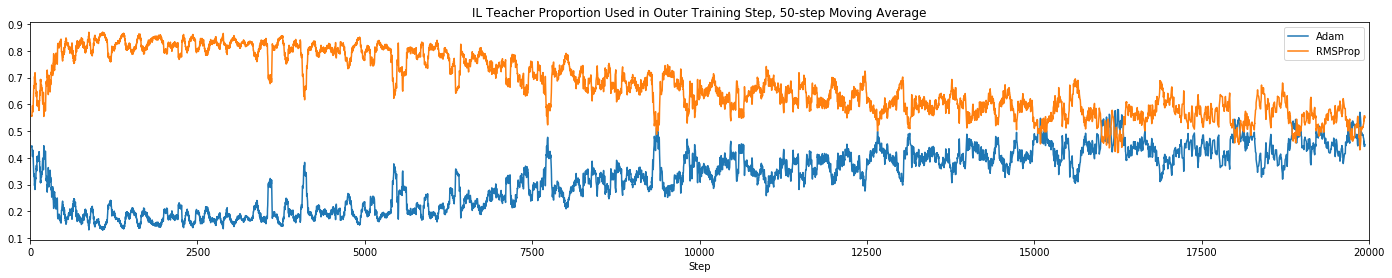

In [6]:
plot_logs(x, window=25)